<center><h1>Interpreting Computational Models for the Humanities</h1></center>
<center><h2>Examining Contribution to Distance Metrics</h2></center>


This notebook uses Cosine similarities to produce a distance matrix using a maximum number of tokens to determine the contribution of words to the model. 

12/06/2018: <a href="http://www.dartmouth.edu/~jed">James E. Dobson</a> (james.e.dobson@dartmouth.edu): Created initial notebook.

In [1]:
import sklearn
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from operator import itemgetter

In [2]:
# Input dataset was created from the ten chapters plus appendix 
# of Frederick Douglass's Narrative of the Life of Frederick Douglass (1845)
texts=["Douglass/01",
       "Douglass/02",
       "Douglass/03",
       "Douglass/04",
       "Douglass/05",
       "Douglass/06",
       "Douglass/07",
       "Douglass/08", 
       "Douglass/09", 
       "Douglass/10", 
       "Douglass/11"]

In [3]:
# vectorize using Scikit Learn
vectorizer = CountVectorizer(input='filename', 
                             stop_words='english',
                             strip_accents='unicode',
                             lowercase=True)
# fit texts to model
dtm_matrix = vectorizer.fit_transform(texts)

# convert from sparse object to numpy array
dtm_matrix = dtm_matrix.toarray()

# tell us about the model
documents, vocabulary = dtm_matrix.shape
print("Documents: {0} Vocabulary: {1}".format(documents,vocabulary))

Documents: 11 Vocabulary: 3996


In [13]:
# calculate distance between texts using cosine_similarity
dist_matrix = 1- cosine_similarity(dtm_matrix)

# display distance from the first text
for x, y in sorted(enumerate(np.round(dist_matrix[0],4)), key=itemgetter(1)):
    print('{0} ({1})'.format(texts[x],y))

Douglass/01 (0.0)
Douglass/09 (0.5037)
Douglass/08 (0.5212)
Douglass/10 (0.5432)
Douglass/02 (0.5898)
Douglass/07 (0.6201)
Douglass/11 (0.6268)
Douglass/03 (0.6286)
Douglass/06 (0.6296)
Douglass/05 (0.6543)
Douglass/04 (0.6901)


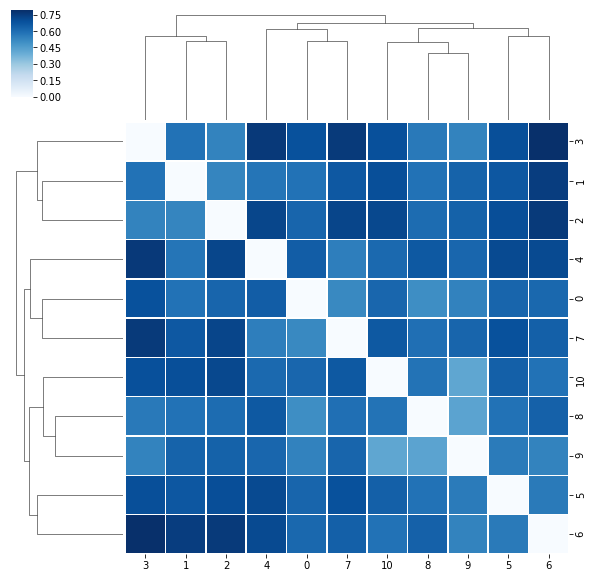

In [14]:
# display the similarity matrix (white=similar, dark blue=different)
import seaborn as sn
%matplotlib inline
sn.clustermap(dist_matrix,cmap='Blues',fmt='g',linewidths=.5)

In [6]:
# sort and display top fifty most variant words by 
# comparing just rows 3 and 6 (chapters 4 & 7) as the far ends of the above 

variance_table=dict()
for t,y in enumerate(np.var(np.array([dtm_matrix[3,...],dtm_matrix[7,...]]), axis=0)):
    variance_table[t] = y
    
for k,v in sorted(variance_table.items(), key=itemgetter(1), reverse=True)[:50]:
    print(vectorizer.get_feature_names()[k],v)

mr 110.25
gore 56.25
master 56.25
old 49.0
children 30.25
baltimore 16.0
colonel 16.0
lloyd 16.0
demby 12.25
gone 12.25
man 12.25
overseer 12.25
slaves 12.25
hands 9.0
little 9.0
age 6.25
andrew 6.25
death 6.25
died 6.25
girl 6.25
grandmother 6.25
left 6.25
lucretia 6.25
property 6.25
grandchildren 4.0
known 4.0
leaving 4.0
men 4.0
punishment 4.0
return 4.0
slavery 4.0
time 4.0
took 4.0
valuation 4.0
words 4.0
years 4.0
accused 2.25
bondly 2.25
brother 2.25
captain 2.25
change 2.25
come 2.25
community 2.25
condition 2.25
convicted 2.25
crime 2.25
daughter 2.25
did 2.25
division 2.25
felt 2.25


In [7]:
# sort and display top fifty most variant words by 
# comparing chapter 10 (row 9) to the mean 

mean_rows = np.mean(dtm_matrix,axis=0)

variance_table=dict()
for t,y in enumerate(np.var(np.array([mean_rows,dtm_matrix[9,...]]), axis=0)):
    variance_table[t] = y
    
for k,v in sorted(variance_table.items(), key=itemgetter(1), reverse=True)[:50]:
    print(vectorizer.get_feature_names()[k],v)

mr 1282.94214876
covey 833.109504132
time 250.214876033
slave 216.892561983
did 155.115702479
master 126.051652893
said 113.132231405
man 109.297520661
henry 100.0
gave 94.6198347107
work 94.6198347107
went 93.7376033058
hands 85.1425619835
come 73.8037190083
came 73.0247933884
year 69.1921487603
free 60.4152892562
white 60.4152892562
just 59.7107438017
told 57.6219008264
freeland 52.8925619835
long 52.2334710744
hand 48.3657024793
day 47.1095041322
freedom 45.8698347107
way 44.6466942149
woods 44.6466942149
getting 41.6611570248
morning 41.6611570248
think 41.076446281
slaves 39.9194214876
large 39.347107438
home 37.6549586777
like 36.5475206612
slavery 34.9173553719
blood 31.7685950413
death 31.7685950413
half 30.7520661157
got 29.2582644628
night 28.7685950413
succeeded 25.9173553719
whipped 25.0
gardner 24.5475206612
john 24.5475206612
left 22.347107438
make 22.347107438
eat 21.076446281
head 21.076446281
fred 20.6611570248
michael 20.6611570248


In [8]:
# now calculate based on standard deviation of the mean value for each token
mean_rows = np.mean(dtm_matrix,axis=0)
std_dev = np.std([mean_rows,dtm_matrix[9,...]],axis=0)

In [9]:
# now determine which words contribute to distance 
# via standard deviation from the mean value of each token
mean_rows = np.mean(dtm_matrix,axis=0)
std_dev = np.std([mean_rows,dtm_matrix[9,...]],axis=0)

std_dev_table=dict()
for t,y in enumerate(np.std([mean_rows,dtm_matrix[9,...]],axis=0)):
    std_dev_table[t] = y
    
# sort and display top fifty most deviant words
for k,v in sorted(std_dev_table.items(), key=itemgetter(1), reverse=True)[:50]:
    print(vectorizer.get_feature_names()[k],v)

mr 35.8181818182
covey 28.8636363636
time 15.8181818182
slave 14.7272727273
did 12.4545454545
master 11.2272727273
said 10.6363636364
man 10.4545454545
henry 10.0
gave 9.72727272727
work 9.72727272727
went 9.68181818182
hands 9.22727272727
come 8.59090909091
came 8.54545454545
year 8.31818181818
free 7.77272727273
white 7.77272727273
just 7.72727272727
told 7.59090909091
freeland 7.27272727273
long 7.22727272727
hand 6.95454545455
day 6.86363636364
freedom 6.77272727273
way 6.68181818182
woods 6.68181818182
getting 6.45454545455
morning 6.45454545455
think 6.40909090909
slaves 6.31818181818
large 6.27272727273
home 6.13636363636
like 6.04545454545
slavery 5.90909090909
blood 5.63636363636
death 5.63636363636
half 5.54545454545
got 5.40909090909
night 5.36363636364
succeeded 5.09090909091
whipped 5.0
gardner 4.95454545455
john 4.95454545455
left 4.72727272727
make 4.72727272727
eat 4.59090909091
head 4.59090909091
fred 4.54545454545
michael 4.54545454545
